변수 3개 (하나는 범주형, 나머지 두 개는 수치형 연속변수)의 이원분산분석을 수행하고 통계표를 작성하시오.

In [2]:
import pandas as pd
import numpy as np
import statsmodels.stats

df = pd.read_csv(r'../data/avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


종속변수는 AveragePrice, 독립변수는 type, region으로 설정

가정 : 집단의 측정치는 서로 독립적이며, 정규분포를 따름, 집단 측정치의 분산은 같음

H0
- a와 b 변수의 교호작용은 없음
- a변수에 따른 종속변수의 값에는 차이가 없음
- b변수에 따른 종속변수의 값에는 차이가 없음

H1 
- a와 b 변수의 교호작용은 존재
- a변수에 따른 종속변수의 값에는 차이가 존재
- b변수에 따른 종속변수의 값에는 차이가 존재

In [14]:
avocado = df[['AveragePrice', 'type', 'region']]
avocado = avocado[(avocado['region'] == 'Orlando') |
                (avocado['region'] == 'Boston') |
                (avocado['region'] == 'Chicago')].reset_index(drop=True)
avocado

,AveragePrice,type,region
0,1.13,conventional,Boston
1,1.07,conventional,Boston
2,1.01,conventional,Boston
3,1.02,conventional,Boston
4,1.19,conventional,Boston
...,...,...,...
1009,1.36,organic,Orlando
1010,1.67,organic,Orlando
1011,1.53,organic,Orlando
1012,1.55,organic,Orlando


In [15]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'AveragePrice ~ C(type) + C(region) + C(type):C(region)'
model = ols(formula, avocado).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(type),56.111007,1.0,828.218296,1.989417e-133
C(region),0.432136,2.0,3.189242,4.161918e-02
C(type):C(region),1.878817,2.0,13.866003,1.146622e-06
Residual,68.291047,1008.0,NaN,NaN


- 두 변수의 교호작용 결과 p-value는 0.05보다 작기 때문에 귀무가설을 기각함 -> type과 region사이에 교호작용이 존재함
- 또한 주효과 검정도 모두 유의수준 0.05하에서 유의하기 때문에 각 변수의 종류에 따른 AveragePrice의 차이가 존재한다고 판단할 수 있음

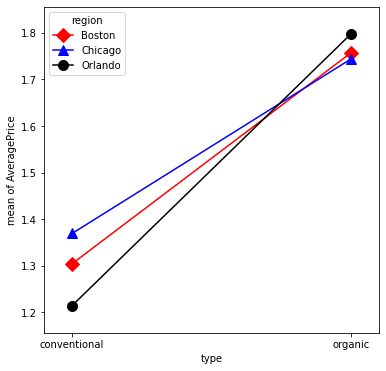

In [19]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

price = avocado['AveragePrice']
region = avocado['region']
a_type = avocado['type']

fig, ax = plt.subplots(figsize=(6,6))
fig = interaction_plot(a_type, region, price,
                       colors = ['red', 'blue','black'], 
                       markers = ['D','^','o'], ms=10, ax=ax)

상호작용 효과와 각 변수별 차이가 확실히 나타남을 알 수 있다. 특히, orlando에서는 다른 지역보다 conventional 대비 organic의 선호도가 높은 것을 알 수 있다.